In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 객체만들기

- Seriesf를 이용 기본 정수 인덱스를 생성시키는

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

<big>pandas.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)</big>

In [6]:
pd.date_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [7]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

-인덱스와 레이블이있는 열이있는 DataFrame을  NumPy 배열을 전달하여  만들기

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.267767,0.314347,-0.361210,-0.214252
2013-01-02,1.277639,0.365055,-0.165806,0.455396
2013-01-03,-0.930405,-0.851652,-0.382488,-0.380132
2013-01-04,-1.430372,-0.263879,-0.171566,0.605062
2013-01-05,0.649136,0.807155,1.143186,1.638428
2013-01-06,-0.076193,-1.642584,0.929229,-0.292153


-딕셔너리를 이용하여 DataFrame 만들기

In [9]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Data 보기

In [10]:
df.head()

,A,B,C,D
2013-01-01,-0.912117,-1.296722,1.240275,0.309403
2013-01-02,1.353009,-0.479168,2.863006,-0.378503
2013-01-03,0.805790,-1.370506,-0.325651,-1.014407
2013-01-04,2.378603,0.005678,0.032549,0.222041
2013-01-05,0.504051,0.174493,0.533300,-0.728119


In [11]:
df.tail(3)

,A,B,C,D
2013-01-04,2.378603,0.005678,0.032549,0.222041
2013-01-05,0.504051,0.174493,0.533300,-0.728119
2013-01-06,-0.716448,0.304361,-0.295728,0.395727


<big>Display the index, columns, and the underlying NumPy data:</big>

In [12]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.values

array([[-0.91211664, -1.29672239,  1.24027543,  0.30940328],
       [ 1.35300904, -0.47916769,  2.86300607, -0.37850311],
       [ 0.80579045, -1.37050649, -0.32565143, -1.01440684],
       [ 2.37860277,  0.00567754,  0.0325494 ,  0.2220406 ],
       [ 0.50405097,  0.17449311,  0.53330022, -0.72811946],
       [-0.71644778,  0.3043611 , -0.29572811,  0.39572667]])

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

<big>데이터의 요약통계 </big>

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.568815,-0.443644,0.674625,-0.198976
std,1.248655,0.739131,1.223384,0.594395
min,-0.912117,-1.370506,-0.325651,-1.014407
25%,-0.411323,-1.092334,-0.213659,-0.640715
50%,0.654921,-0.236745,0.282925,-0.078231
75%,1.216204,0.132289,1.063532,0.287563
max,2.378603,0.304361,2.863006,0.395727


In [16]:
dft=df.T
dft

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.912117,1.353009,0.805790,2.378603,0.504051,-0.716448
B,-1.296722,-0.479168,-1.370506,0.005678,0.174493,0.304361
C,1.240275,2.863006,-0.325651,0.032549,0.533300,-0.295728
D,0.309403,-0.378503,-1.014407,0.222041,-0.728119,0.395727


In [17]:
dfsort=df.sort_index(axis=1, ascending=False)
dfsort

,D,C,B,A
2013-01-01,0.309403,1.240275,-1.296722,-0.912117
2013-01-02,-0.378503,2.863006,-0.479168,1.353009
2013-01-03,-1.014407,-0.325651,-1.370506,0.805790
2013-01-04,0.222041,0.032549,0.005678,2.378603
2013-01-05,-0.728119,0.533300,0.174493,0.504051
2013-01-06,0.395727,-0.295728,0.304361,-0.716448


In [11]:
df.sort_values(by=['B','C']) ##여러개 

,A,B,C,D
2013-01-06,-0.076193,-1.642584,0.929229,-0.292153
2013-01-03,-0.930405,-0.851652,-0.382488,-0.380132
2013-01-04,-1.430372,-0.263879,-0.171566,0.605062
2013-01-01,0.267767,0.314347,-0.361210,-0.214252
2013-01-02,1.277639,0.365055,-0.165806,0.455396
2013-01-05,0.649136,0.807155,1.143186,1.638428


# <big>Selection</big>

<big>df.A와 동일한 Series를 생성하는 단일 열 선택 :</big>

In [19]:
df.A

2013-01-01   -0.912117
2013-01-02    1.353009
2013-01-03    0.805790
2013-01-04    2.378603
2013-01-05    0.504051
2013-01-06   -0.716448
Freq: D, Name: A, dtype: float64

In [20]:
df['A']

2013-01-01   -0.912117
2013-01-02    1.353009
2013-01-03    0.805790
2013-01-04    2.378603
2013-01-05    0.504051
2013-01-06   -0.716448
Freq: D, Name: A, dtype: float64

<big>Selecting via [], which slices the rows.</big>

In [21]:
df[0:3]

,A,B,C,D
2013-01-01,-0.912117,-1.296722,1.240275,0.309403
2013-01-02,1.353009,-0.479168,2.863006,-0.378503
2013-01-03,0.805790,-1.370506,-0.325651,-1.014407


In [22]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.353009,-0.479168,2.863006,-0.378503
2013-01-03,0.805790,-1.370506,-0.325651,-1.014407
2013-01-04,2.378603,0.005678,0.032549,0.222041


<big>Selection by Label<br>
For getting a cross section using a label:</big>

In [28]:
df.loc[dates[0]]

A    0.871452
B   -1.179912
C    0.661857
D   -1.359171
Name: 2013-01-01 00:00:00, dtype: float64

<big>Selecting on a multi-axis by label:</big>

In [29]:
 df.loc[:,['A','B']]  ##표현법

,A,B
2013-01-01,0.871452,-1.179912
2013-01-02,-1.397692,0.938592
2013-01-03,0.498949,0.060728
2013-01-04,-0.851168,0.810839
2013-01-05,0.529233,1.031667
2013-01-06,-0.029233,1.026858


-Showing label slicing, both endpoints are included:

In [30]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.397692,0.938592
2013-01-03,0.498949,0.060728
2013-01-04,-0.851168,0.810839


-Reduction in the dimensions of the returned object:

In [31]:
df.loc['20130102',['A','B']]

A   -1.397692
B    0.938592
Name: 2013-01-02 00:00:00, dtype: float64

-For getting a scalar value:

In [33]:
 df.loc[dates[0],'A']

0.87145172710139163

<big>Selection by Position</big>

In [34]:
df.iloc[3]

A   -0.851168
B    0.810839
C    0.056274
D    2.162408
Name: 2013-01-04 00:00:00, dtype: float64

In [35]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.851168,0.810839
2013-01-05,0.529233,1.031667


In [36]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.397692,-0.223969
2013-01-03,0.498949,-0.105759
2013-01-05,0.529233,-0.367967


-For slicing columns explicitly:

In [37]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.179912,0.661857
2013-01-02,0.938592,-0.223969
2013-01-03,0.060728,-0.105759
2013-01-04,0.810839,0.056274
2013-01-05,1.031667,-0.367967
2013-01-06,1.026858,0.284498


-For getting a value explicitly:

In [38]:
df.iloc[1,1]

0.93859209575143321

<big>Boolean Indexing</big>

-Using a single column’s values to select data.

In [39]:
df


,A,B,C,D
2013-01-01,0.871452,-1.179912,0.661857,-1.359171
2013-01-02,-1.397692,0.938592,-0.223969,-1.068785
2013-01-03,0.498949,0.060728,-0.105759,-0.150217
2013-01-04,-0.851168,0.810839,0.056274,2.162408
2013-01-05,0.529233,1.031667,-0.367967,0.113754
2013-01-06,-0.029233,1.026858,0.284498,-1.947414


In [40]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.871452,-1.179912,0.661857,-1.359171
2013-01-03,0.498949,0.060728,-0.105759,-0.150217
2013-01-05,0.529233,1.031667,-0.367967,0.113754


-Selecting values from a DataFrame where a boolean condition is met.

 -불리언  조건을 충족하는 DataFrame에서 값을 선택합니다.</big>

In [42]:
df[df>0]

,A,B,C,D
2013-01-01,0.871452,NaN,0.661857,NaN
2013-01-02,NaN,0.938592,NaN,NaN
2013-01-03,0.498949,0.060728,NaN,NaN
2013-01-04,NaN,0.810839,0.056274,2.162408
2013-01-05,0.529233,1.031667,NaN,0.113754
2013-01-06,NaN,1.026858,0.284498,NaN


-isin()필터링 방법 사용 :

In [44]:
df2=df.copy()
df2['E']=['one', 'one','two','three','four','three']  ##column 추가하기
df2

,A,B,C,D,E
2013-01-01,0.871452,-1.179912,0.661857,-1.359171,one
2013-01-02,-1.397692,0.938592,-0.223969,-1.068785,one
2013-01-03,0.498949,0.060728,-0.105759,-0.150217,two
2013-01-04,-0.851168,0.810839,0.056274,2.162408,three
2013-01-05,0.529233,1.031667,-0.367967,0.113754,four
2013-01-06,-0.029233,1.026858,0.284498,-1.947414,three


In [45]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.498949,0.060728,-0.105759,-0.150217,two
2013-01-05,0.529233,1.031667,-0.367967,0.113754,four


In [ ]:
<big>DataFrame.isin(values)[source]<br>
Return boolean DataFrame showing whether each element in the DataFrame is contained in values.</big>

In [46]:
dfex = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'f']})

In [47]:
dfex.isin([1, 3, 12, 'a'])

,A,B
0,True,True
1,False,False
2,True,False


-인덱스에 의해서 정렬된 새 열

In [48]:
 s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
    



In [49]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

-레이블별로 값 설정 :

In [51]:
 df['F'] = s1

In [52]:
df

,A,B,C,D,F
2013-01-01,0.871452,-1.179912,0.661857,-1.359171,NaN
2013-01-02,-1.397692,0.938592,-0.223969,-1.068785,1.0
2013-01-03,0.498949,0.060728,-0.105759,-0.150217,2.0
2013-01-04,-0.851168,0.810839,0.056274,2.162408,3.0
2013-01-05,0.529233,1.031667,-0.367967,0.113754,4.0
2013-01-06,-0.029233,1.026858,0.284498,-1.947414,5.0


-레이블별로 값 설정 :

In [54]:
df.at[dates[0],'A'] = 0

-위치 별 값 설정 :

In [55]:
df.iat[0,1] = 0

In [56]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.661857,-1.359171,NaN
2013-01-02,-1.397692,0.938592,-0.223969,-1.068785,1.0
2013-01-03,0.498949,0.060728,-0.105759,-0.150217,2.0
2013-01-04,-0.851168,0.810839,0.056274,2.162408,3.0
2013-01-05,0.529233,1.031667,-0.367967,0.113754,4.0
2013-01-06,-0.029233,1.026858,0.284498,-1.947414,5.0


In [ ]:
-NumPy 배열을 지정하여 설정 :

In [57]:
df.loc[:,'D'] = np.array([5] * len(df))

In [58]:
np.array([5] * len(df))

array([5, 5, 5, 5, 5, 5])

In [59]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.661857,5,NaN
2013-01-02,-1.397692,0.938592,-0.223969,5,1.0
2013-01-03,0.498949,0.060728,-0.105759,5,2.0
2013-01-04,-0.851168,0.810839,0.056274,5,3.0
2013-01-05,0.529233,1.031667,-0.367967,5,4.0
2013-01-06,-0.029233,1.026858,0.284498,5,5.0


-where설정이 있는 작업

In [61]:
df2 = df.copy()


In [62]:
df2[df2 > 0] = -df2


In [63]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.661857,-5,NaN
2013-01-02,-1.397692,-0.938592,-0.223969,-5,-1.0
2013-01-03,-0.498949,-0.060728,-0.105759,-5,-2.0
2013-01-04,-0.851168,-0.810839,-0.056274,-5,-3.0
2013-01-05,-0.529233,-1.031667,-0.367967,-5,-4.0
2013-01-06,-0.029233,-1.026858,-0.284498,-5,-5.0


-결측 값 처리, 팬더 np.nan는 누락 된 데이터를 나타 내기 위해 주로이 값 을 사용

In [64]:
##subset , 결측값 처리, dataframe , series, culmns만들기 
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.661857,5,NaN,NaN
2013-01-02,-1.397692,0.938592,-0.223969,5,1.0,NaN
2013-01-03,0.498949,0.060728,-0.105759,5,2.0,NaN
2013-01-04,-0.851168,0.810839,0.056274,5,3.0,NaN


In [65]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.661857,5,NaN,1.0
2013-01-02,-1.397692,0.938592,-0.223969,5,1.0,1.0
2013-01-03,0.498949,0.060728,-0.105759,5,2.0,NaN
2013-01-04,-0.851168,0.810839,0.056274,5,3.0,NaN


-결측 값이 있는  행을 삭제합니다.

결측값 채우기 :
    1. 앞의 값
    2. 뒤의 값
    3. 임의의 값
    4. 평균값

In [67]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.397692,0.938592,-0.223969,5,1.0,1.0


-결측 값 채우기

In [68]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.661857,5,5.0,1.0
2013-01-02,-1.397692,0.938592,-0.223969,5,1.0,1.0
2013-01-03,0.498949,0.060728,-0.105759,5,2.0,5.0
2013-01-04,-0.851168,0.810839,0.056274,5,3.0,5.0


-값이있는 boolean 마스크를 얻으려면 nan.

In [69]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [70]:
df.mean() ##column에 대한 평균 

A   -0.208318
B    0.644780
C    0.050822
D    5.000000
F    3.000000
dtype: float64

In [71]:
df.mean(1)

2013-01-01    1.415464
2013-01-02    1.063386
2013-01-03    1.490783
2013-01-04    1.603189
2013-01-05    2.038586
2013-01-06    2.256424
Freq: D, dtype: float64

In [72]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [23]:
df

,A,B,C,D
2013-01-01,-0.912117,-1.296722,1.240275,0.309403
2013-01-02,1.353009,-0.479168,2.863006,-0.378503
2013-01-03,0.805790,-1.370506,-0.325651,-1.014407
2013-01-04,2.378603,0.005678,0.032549,0.222041
2013-01-05,0.504051,0.174493,0.533300,-0.728119
2013-01-06,-0.716448,0.304361,-0.295728,0.395727


In [24]:
df.sub(s, axis='index') # 마이너스 from  data frame

,A,B,C,D
2013-01-01 00:00:00,NaN,NaN,NaN,NaN
2013-01-02 00:00:00,NaN,NaN,NaN,NaN
2013-01-03 00:00:00,NaN,NaN,NaN,NaN
2013-01-04 00:00:00,NaN,NaN,NaN,NaN
2013-01-05 00:00:00,NaN,NaN,NaN,NaN
2013-01-06 00:00:00,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


-apply 데이터에 함수 적용 :

In [75]:
df.apply(np.cumsum) ####나온다는,,

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.661857,5,NaN
2013-01-02,-1.397692,0.938592,0.437888,10,1.0
2013-01-03,-0.898743,0.999320,0.332129,15,3.0
2013-01-04,-1.749910,1.810159,0.388403,20,6.0
2013-01-05,-1.220677,2.841825,0.020436,25,10.0
2013-01-06,-1.249910,3.868683,0.304934,30,15.0


In [76]:
df.apply(lambda x: x.max() - x.min())

A    1.926925
B    1.031667
C    1.029824
D    0.000000
F    4.000000
dtype: float64

In [77]:
g=df.apply(lambda x: x.max() - x.min(),axis=1)
g

2013-01-01    5.000000
2013-01-02    6.397692
2013-01-03    5.105759
2013-01-04    5.851168
2013-01-05    5.367967
2013-01-06    5.029233
Freq: D, dtype: float64

In [78]:
df['G']=g  ##전체 평균값 붙이기 
df

,A,B,C,D,F,G
2013-01-01,0.000000,0.000000,0.661857,5,NaN,5.000000
2013-01-02,-1.397692,0.938592,-0.223969,5,1.0,6.397692
2013-01-03,0.498949,0.060728,-0.105759,5,2.0,5.105759
2013-01-04,-0.851168,0.810839,0.056274,5,3.0,5.851168
2013-01-05,0.529233,1.031667,-0.367967,5,4.0,5.367967
2013-01-06,-0.029233,1.026858,0.284498,5,5.0,5.029233


In [79]:
ave=df.mean()
ave

A   -0.208318
B    0.644780
C    0.050822
D    5.000000
F    3.000000
G    5.458637
dtype: float64

In [80]:
df.append(ave, ignore_index=True) ##ignore index 주의 


,A,B,C,D,F,G
0,0.000000,0.000000,0.661857,5.0,NaN,5.000000
1,-1.397692,0.938592,-0.223969,5.0,1.0,6.397692
2,0.498949,0.060728,-0.105759,5.0,2.0,5.105759
3,-0.851168,0.810839,0.056274,5.0,3.0,5.851168
4,0.529233,1.031667,-0.367967,5.0,4.0,5.367967
5,-0.029233,1.026858,0.284498,5.0,5.0,5.029233
6,-0.208318,0.644780,0.050822,5.0,3.0,5.458637


-히스토그램 작성 

In [81]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    2
2    6
3    2
4    0
5    1
6    0
7    0
8    1
9    6
dtype: int32

In [82]:

sc=s.value_counts()
sc

0    3
6    2
2    2
1    2
3    1
dtype: int64

In [83]:
%matplotlib inline

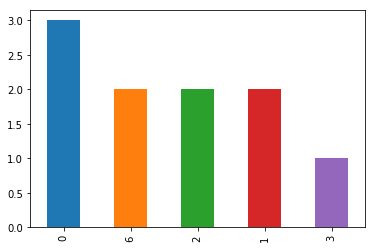

In [84]:
import matplotlib.pyplot as plt
sc.plot.bar()